In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Scalar Product of 2 vectors: dot product of 2 vectors (also equals matrix muliplciation of np.dot(x,y)= x.T@y )
def scalarProduct(x, y):
    return np.dot(x,y)
x=np.array([1,2,3])
y=np.array([2,5,3])
theta=scalarProduct(x,y)
print("product" ,theta)
print("product2" ,x.T@y)

# Normalization of vector: make the vector unit length divinding by it's magnitude
def lengthVector(x):
    result=0
    for i in range(len(x)):
        result=result+x[i]**2
    return math.sqrt(result)
A=np.array([3,4])
print(np.linalg.norm(A))


# Angle between vectors
def angleBetween(x,y):
    cosTheta =scalarProduct(x,y)/(lengthVector(x) * lengthVector(y))
    return math.acos(cosTheta)*180/np.pi
#Try example
x=np.array([1,2,3])
y=np.array([2,5,3])
theta=angleBetween(x,y)
print("angle between two vectors", theta)

#Vector mulitplications( matrices)
def vectorProduct(A,B):
     return A.T@B
# NOTE: We can use below alternative, but do not use B*z as it leads to cross product
#A.T.dot(B)
#np.matmul(A.T,B)


product 21
product2 21
5.0
angle between two vectors 24.43024479255041


In [3]:
# Quadratic form = zT B z ( matrix representation of quadratic form of vector Z, where B is constant(transformation) matrix)
def quadraticForm(B,z):
    return z.T@B@z
#Examples
z=np.array([[1],[2],[3]])
B=np.array([[1,2,3],[2,2,1],[3,2,0]])
out= quadraticForm(B,z)
print("quadratic form", out)

quadratic form [[53]]


In [4]:
#Trace of a matrix: sum of the diagnals 
def trace(A):
    result=0
    for i in range(len(A)):
        result=result+A[i][i]
    return result

A=np.array([[1,2,2],[2,2,2],[3,1,0]])
print("trace", trace(A))

# Determinant of matrix: Magnitude of a matrix
def det(A):
    return np.linalg.det(A)

# Inverse of a Matrix
def inverse(A):
    return np.linalg.inv(B)
B=np.array([[1,0], [0,1]])
print("inverse of identify matrix should be the same", inverse(B))

# Eigen Values, Eigen Vectors: Which doesn't change the direction with the transformation A but magnitude by Eigen Value
w,v= np.linalg.eig(A)
print(A)
print("eigen values", w)
print("eigen vectors", v)
        

trace 3
inverse of identify matrix should be the same [[1. 0.]
 [0. 1.]]
[[1 2 2]
 [2 2 2]
 [3 1 0]]
eigen values [ 5.05606031 -1.84122207 -0.21483824]
eigen vectors [[-0.5657765  -0.45961962  0.20566259]
 [-0.67767716 -0.20999214 -0.75162785]
 [-0.46973464  0.86293285  0.62670446]]


In [5]:
#SVD: Singular Value decomposition

B= np.array([[3,2,1],[2,6,5],[1,5,9]])
z=np.array(np.random.rand(3))
print(z)
print(B)
print(z.T@B@z)
D, U= np.linalg.eig(B)
print(U@U.T)

#SOLUTION 1:
#U@U.T looks like a synmmetric matrix. Infact, it is an Identity Matrix I
#PROOF: Here B is a symmetric matrix i.e B=B.T and U is eigen vector of B.
# Eigen vectors of a Symmetric matrix are orthogonal to each other(linearly independent) i.e U.T=inv(U) i.e U inverse. 
#Multiply by U both sides U@U.T=U@inv(U)=I

[0.2756771  0.64082501 0.72737767]
[[3 2 1]
 [2 6 5]
 [1 5 9]]
13.22254219028411
[[ 1.00000000e+00 -1.11022302e-16  5.55111512e-17]
 [-1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  1.00000000e+00]]


variation within the bin counts 0.0001036754


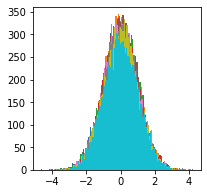

In [6]:
x=np.random.randn(1000,1)# it creates gaussian distribution with mean=0 and variacne =1
plt.figure(figsize=(3,3))
n,bins,patches=plt.hist(x,bins=100,color='m',alpha=0.5,rwidth=0.5)
MaxTrials=10
samples=10000
numBins=100
for i in range(MaxTrials):
    x=np.random.randn(samples,1)
    counts,bins,patches=plt.hist(x,numBins)
print("variation within the bin counts",np.var(counts/samples))

#OBSERVATION: As the Number of bins increases the variance reduces. 
# As number of Samples increases variance increases if we don't change the bin size.
# so we need to maintain the relative percentage of number of bins with number of Samples. for meaningful visual observations

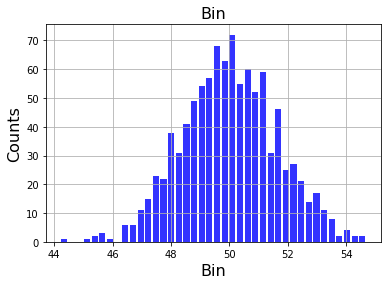

In [7]:
n=1000
x1=np.zeros(n)
for i in range(n):
    x1[i]=sum(np.random.rand(16,1))-sum(np.random.rand(16,1)) +50
plt.hist(x1,40,color='b',alpha=0.8,rwidth=0.8)   
plt.xlabel('Bin',FontSize=16)
plt.ylabel('Counts',FontSize=16)
plt.grid(True)
plt.title('Bin',FontSize=16)
plt.savefig('/Users/hyadaval/Desktop/DataScience/MachineLearning/Labs/Lab1/Harika2')
#NOTE1: The distribution is uniform with the number of samples increases. So more stable and uniform distribution with larger set of data
#NOTE2:The Mean is around zero as with our definition of (random-random)
#NOTE3:The standard deviation(variance) increases as we increase number of numbers we add
#Example: With 1000 number of numbers, the standard deviation is around 20. 
#When the number of numbers to 10, the standard deviation reduces to 2
#So, we can define a guassin distribution X, with mean and variance by providing them as input parameters of x definition above 
#for i in range(n):
  #  x1[i]=sum(np.random.rand(variance,1))-sum(np.random.rand(variacne,1)) + mean
    
### CENTRAL LIMIT THEOREM


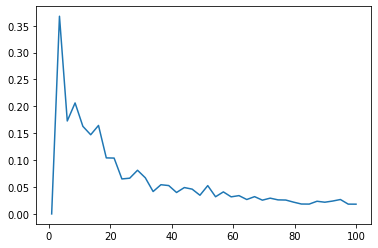

In [8]:
sampleSizeRange=np.linspace(1,100,40)
sampleSize=len(sampleSizeRange)
plotVar=np.zeros(sampleSize)
for i in range(sampleSize):
    numOfSamples=np.int(sampleSizeRange[i])
    maxTrials=100
    vTrial=np.zeros(maxTrials)
    for j in range(maxTrials):
        x=np.random.randn(numOfSamples,1)
        vTrial[j]=np.var(x)
    plotVar[i]=np.var(vTrial)
plt.plot(sampleSizeRange,plotVar)
#NOTE1: As the number of trials increases the variance reduces uniformaly with sample set.
#NOTE2: As the number of samples increases the variance reduces.
#OBSERVATION: Larger sample set with more number of trials produces low variance distribution


In [9]:
def gaussian2D(x,m,C):
    Ci=np.linalg.inv(C)
    dC=np.linalg.det(C)
    num=np.exp(-0.5* np.dot((x-m).T, np.dot(Ci,(x-m))))
    den =2*np.pi*dC
    return num/den
def twoDgaussianPlot(nx,ny,m,C):
    x=np.linspace(-5,5,nx)
    y=np.linspace(-5,5,ny)
    X,Y=np.meshgrid(x,y,indexing='ij')
    Z=np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec=np.array([X[i,j],Y[i,j]])
            Z[i,j]=gaussian2D(xvec,m,C)
    return X,Y,Z

(2,)


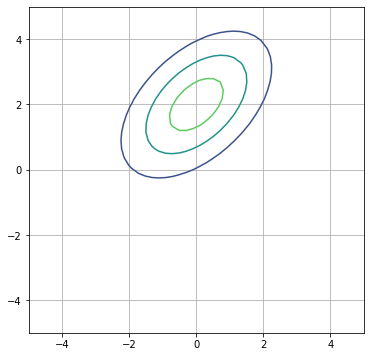

In [10]:
nx,ny=50,40
plt.figure(figsize=(6,6))
m1=np.array([0,2])
print(m1.shape)
C1=np.array([[2,1],[1,2]], np.float32)
Xp, Yp,Zp=twoDgaussianPlot(nx,ny,m1,C1)
plt.contour(Xp, Yp,Zp,3)
plt.grid(True)

[2 0]


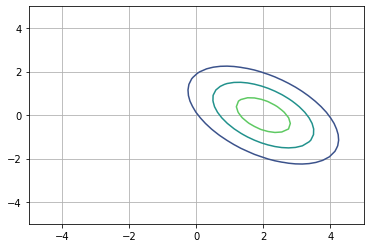

In [10]:
m2=np.array([2,0])
print((m2))
C2=np.array([[2,-1],[-1,2]], np.float32)
Xp, Yp,Zp=twoDgaussianPlot(nx,ny,m2,C2)
plt.contour(Xp, Yp,Zp,3)
plt.grid(True)

[-2 -2]


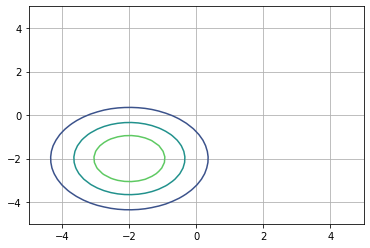

In [11]:
m2=np.array([-2,-2])
print((m2))
C2=np.array([[2,0],[0,2]], np.float32)
Xp, Yp,Zp=twoDgaussianPlot(nx,ny,m2,C2)
plt.contour(Xp, Yp,Zp,3)
plt.grid(True)

In [12]:
C=np.array([[2,1],[1,2]])
A=np.linalg.cholesky(C)

print(A)
print(np.linalg.det(A))

u,W=np.linalg.eig(C)
print("eigen values", u)
print("eigen vectors", W)
print("det of C", np.linalg.det(W))
print(W@W.T)

[[1.41421356 0.        ]
 [0.70710678 1.22474487]]
1.7320508075688772
eigen values [3. 1.]
eigen vectors [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
det of C 0.9999999999999998
[[1. 0.]
 [0. 1.]]


In [13]:
X=np.random.randn(1000,2)
#This creates bivariate “normal” (Gaussian) distribution of mean 0 and variance of Identity matrix.
print("magnitude of covariacne of X", np.linalg.det(np.cov(X)))
#Why are we mulitplying by A.T where as we want to transforma X vector by A ? 
#y=Ax for each vector. When we have 1000 vectors. we need to use matrix mulitplication.
#Here x vector multiplication is same as Y=X@A.T muliplication
Y=X@A.T



magnitude of covariacne of X 0.0


eigen valueso f C [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


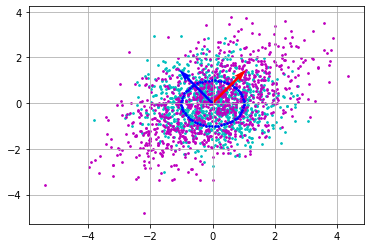

In [18]:
plt.scatter(X[:,0], X[:,1], s=3,c='c')
plt.scatter(Y[:,0], Y[:,1], s=3,c='m')
plt.grid(True)
theta = np.arange(0,2*np.pi,0.1) 
u=[np.cos(theta), np.sin(theta)]
#vector u is circle mean at zero and covariance of 1. The direction of the vector changes as theta changes.
plt.scatter(u[0], u[1], s=3,c='b')
u,W=np.linalg.eig(C)
print("eigen valueso f C", W)
V = np.array([[0.5,0.5],[-0.5,0.5]])
origin = [0], [0] # origin point
#just to draw
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=5)
plt.savefig('/Users/hyadaval/Desktop/DataScience/MachineLearning/Labs/Lab1/Harika_Ax')
# Mean if increased by magnitude of A
#OBSERVATION: Y is:PROJECTION OF X in the new basis through tranformation A.
#Here the uniform distribution is maintained, only it is streched by magnitude(i.e |A|) and rotated by 45 degrees

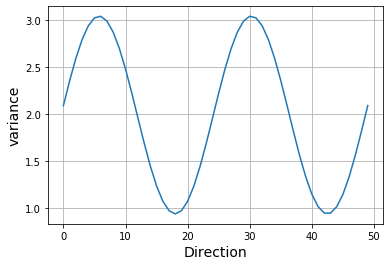

In [15]:
points=50
pVars=np.zeros(points)
thRange=np.linspace(0, 2*np.pi,points)
for n in range(points):
    theta=thRange[n]
    u=[np.cos(theta),np.sin(theta)]
    pVars[n]=np.var(Y@u)
plt.plot(pVars)

plt.grid(True)
plt.xlabel("Direction", fontsize=14)
plt.ylabel("variance", fontsize=14)
plt.savefig('/Users/hyadaval/Desktop/DataScience/MachineLearning/Labs/Lab1/Harika')
#eigen vectors of C are orthogonal to each other.one at angles 45 degree and another at 135.
#Projection os variance is highest along eigen direction and least 
#along another eigen vector(which is parpendicular to other)
#distribution Y doesn't change with theta(direction) so constant against Theta.
#But the vector u is a circle with mean at zero and covariance of 1. The direction of the vector changes as theta changes.
#The direction of u starts at theta = 0 i.e(1,0) and goes and down towards (0,1) 
#and makes a complete circle over 360 degrees.
#when the direction of vector u is same as the distribution plane , the angle b/w is zero so variance is peak. 
#This happens when the direction of vector u is 45 degree as the distribution is angled at 45 degrees. So the variance is max at 45 degree.

#With Theta: the variane changes like a sin wave, why ? where as the vector u is cos wave
# another observation: eigen vectors of C are orthogonal to each other and ANTI SYMMETRIC. i/e W.T=-W
# But here, our distribution transformation is A here i.e angled at 60 degrees.
#Here the distribution (In mathematical terms: eigen vectors) is angled at 60 degrees, 
# The projection variance is less when the projected plan is parpendicular to distribution plane( eigen vectors)
# and it is highest when projection is along the plane. So variance is highest at 60 degrees and leaset 90+60 = 150 degrees.


#Observations drawn:

#Vector u is a circle starts at (1,0) going towards(0,1) with theta 0 to 90
#distribution Y doesn't change with theta so constant against Theta.
#eigen vectors of C are orthogonal to each other.one angled at 45 degrees and another at 135.
#Variance of the projected points is highest along eigen vector angles at 45 degree and least at 135 degrees.
#As the vector u is circle, variance of projection is harmonic function like a sin wave.
#If we change C=[[2,-1],[-1,2]], then projection of variance becomes cos wave (opposite of previous results)




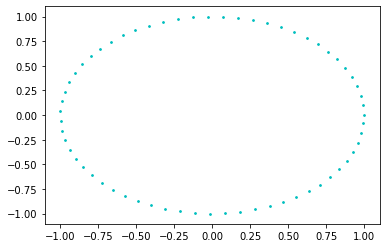

In [21]:
x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.sin(x)
u=[np.cos(x), np.sin(x)]
#vector u is circle mean at zero and covariance of 1. The direction of the vector changes as theta changes.
plt.scatter(u[0], u[1], s=3,c='c')
plt.show()

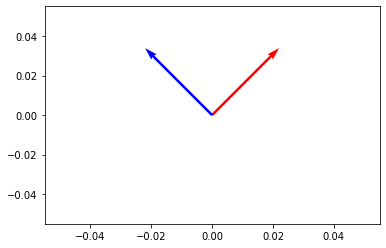

In [31]:
V = np.array([[1,1],[-1,1]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=5)